In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas._libs.algos import pad
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model, metrics, model_selection, svm, naive_bayes



In [14]:
# Load the dataset
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


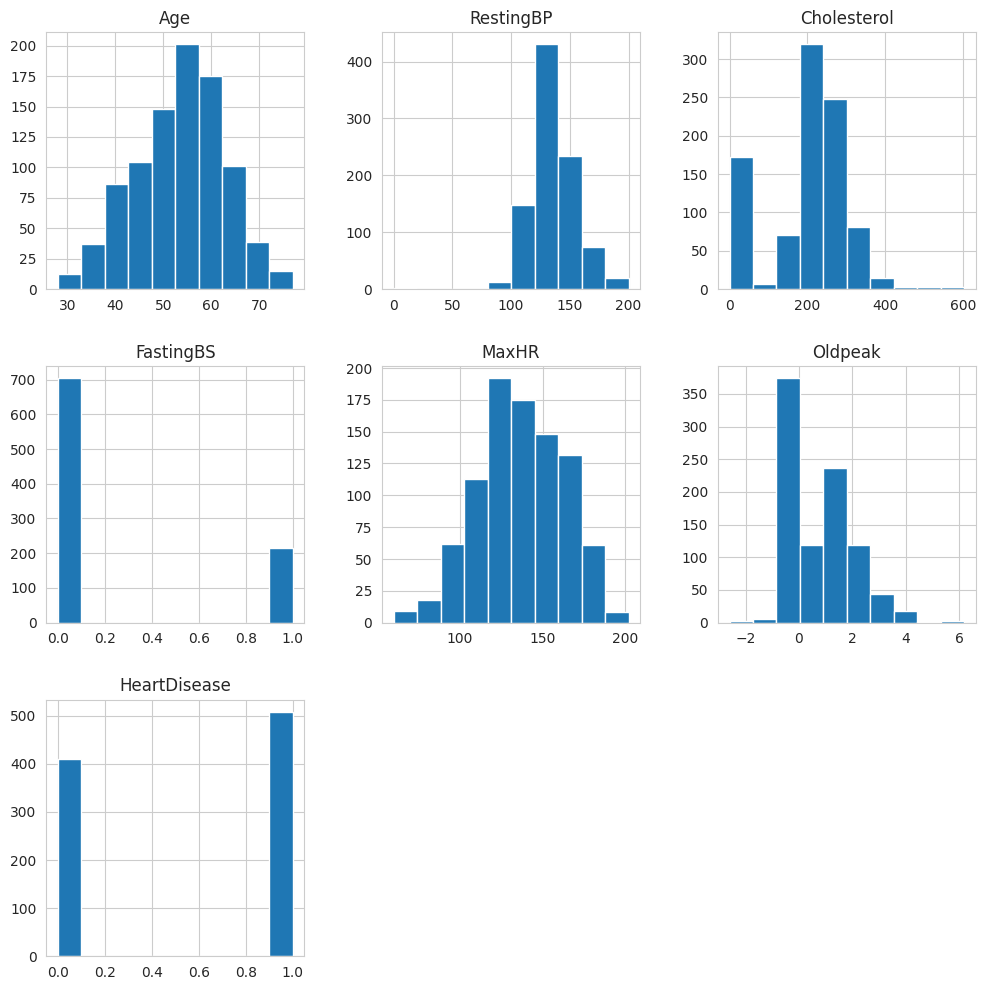

In [15]:
# visualize the data 1: show histograms for each numeric factor

heart.hist(figsize=(12,12))
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

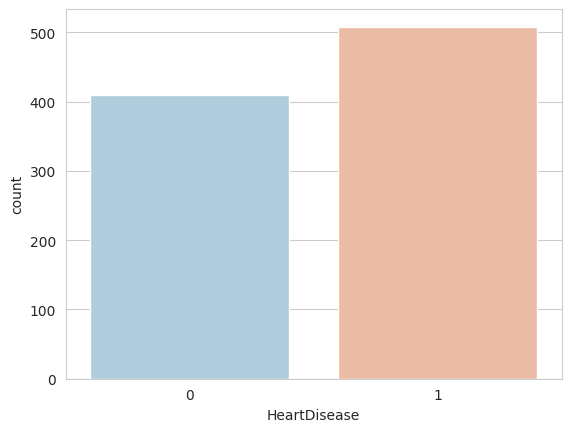

In [16]:
# visualize the data 2: number of records with heart disease and no heart disease
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=heart,palette='RdBu_r')

In [17]:
heart.shape
list(heart)
heart.info()
heart.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<ipython-input-18-69583db4860a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr(method='pearson', min_periods=1),annot=True)


<Axes: >

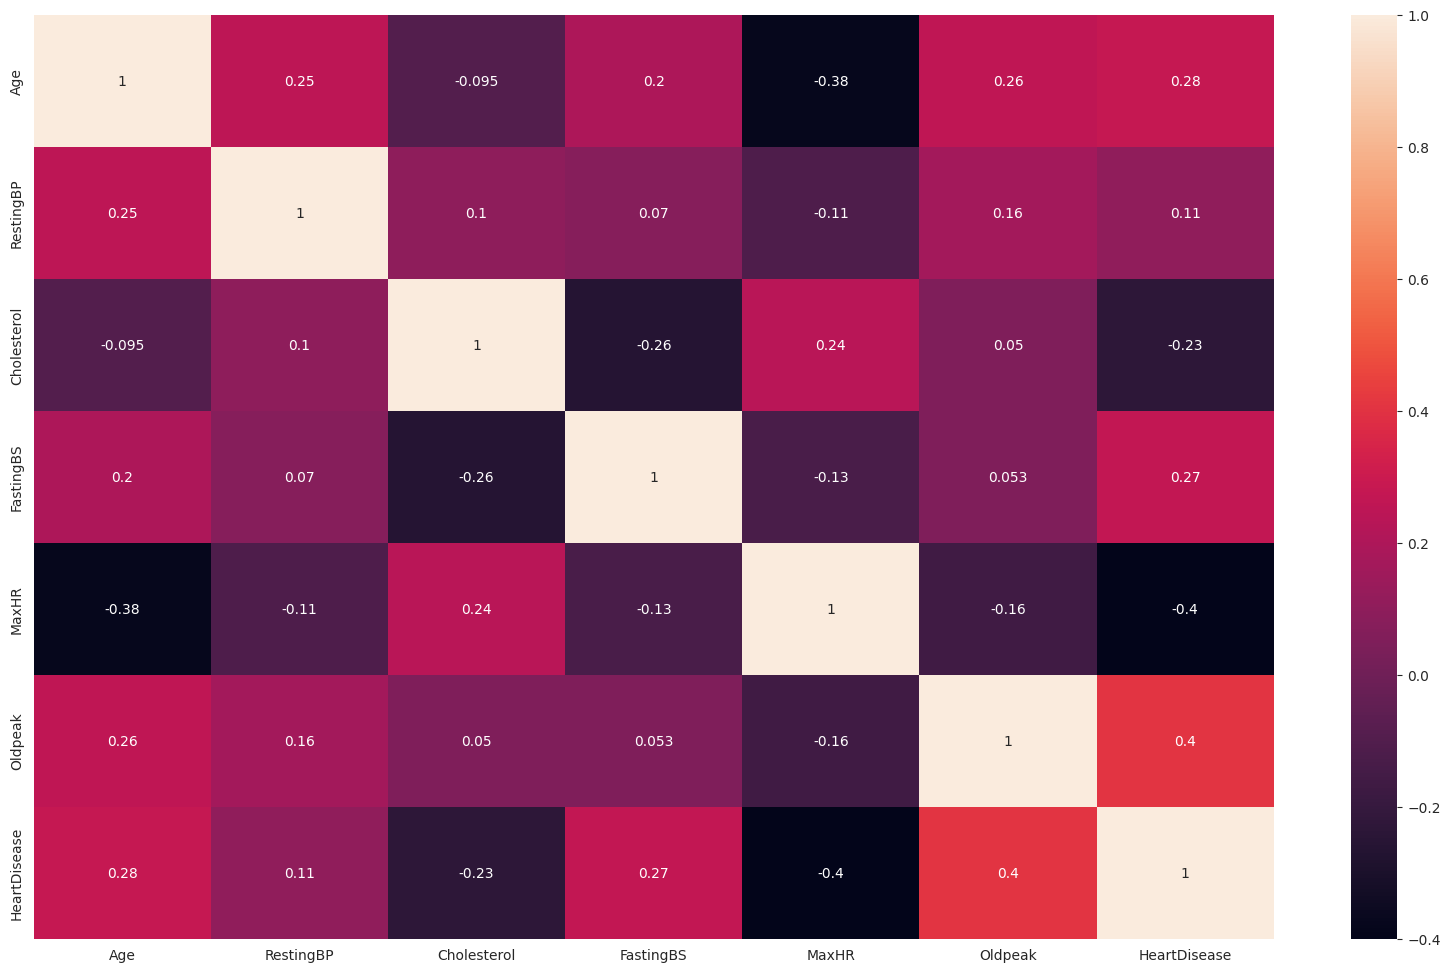

In [18]:
# visualize the data 3: Correlation heatmap
fig=plt.figure(figsize=(20,12))
fig.patch.set_facecolor('white')
sns.heatmap(heart.corr(method='pearson', min_periods=1),annot=True)


In [19]:
# Machine learning model
mylog_model = linear_model.LogisticRegression(max_iter=1000)

# numeric values only, as discussed above
y = heart.select_dtypes(include=np.number).values[:, 6]
X = heart.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
mylog_model.fit(X_train, y_train)

# assess model peformance - can run multiple times (sometimes fails for max iterations)
# accuracy remains greater than 70%, typically around 75%
# this is adequate performance to meet objectives - try to improve with different models and by cleaning up data
y_pred = mylog_model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7771739130434783


In [20]:
# Data cleanup
cleaned_heart = heart.drop(heart[heart['Cholesterol'] == 0].index)
cleaned_heart = cleaned_heart.drop(cleaned_heart[cleaned_heart['RestingBP'] == 0].index)
print(cleaned_heart)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [21]:
# Machinea learning model with updated data
log_model_updated = linear_model.LogisticRegression()

# numeric values only, as discussed above
y = cleaned_heart.select_dtypes(include=np.number).values[:, 6]
X = cleaned_heart.select_dtypes(include=np.number).values[:, 0:6]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# develop model
log_model_updated.fit(X_train, y_train)

# assess model peformance - runs more stable (no max iteration errors)
# accuracy improved slightly after cleaning up of data (ranges from 75% to 78.6%)
# this is adequate performance to meet objectives - see if using alternate model further improves.
y_pred = log_model_updated.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.76


In [22]:
# Functions for interactive UI
def proba_heart_disease(age, rBP, chol, fBS, maxHR, peak):
    if fBS == 'Yes':
        fBS = 1
    else:
        fBS = 0
    prob = log_model_updated.predict_proba([[age, rBP, chol, fBS, maxHR, peak]])[0,1]
    print("")
    print(f'Probability of heart disease: {prob:.2f}')
    print("")
    print("")

In [23]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, FloatSlider, Text, Combobox, Checkbox

style = {'description_width': 'initial'}
fBS_rBtn = widgets.RadioButtons(
    options = ['Yes','No'],
    description = 'Fasting Blood Sugar > 120 mg/dl',
    style=style
)
age_slider = widgets.IntSlider(min=28, max=77, step=1, description='Age',
                              style=style)
rBP_slider = widgets.IntSlider(min=92, max=200, step=1,
                               description='Resting Blood Pressure',
                               style=style)
chol_slider = widgets.IntSlider(min=85, max=603, step=1,
                               description='Cholesterol',
                               style=style)
maxHR_slider = widgets.IntSlider(min=69, max=202, step=1,
                               description='Maximum Heart Rate',
                               style=style)
peak_slider = widgets.FloatSlider(min=0.0, max=6.2, step=0.1,
                               description='Oldpeak',
                               style=style)

In [24]:
display(widgets.interact(proba_heart_disease,
        age=age_slider,
        rBP=rBP_slider,
        chol=chol_slider,
        fBS=fBS_rBtn,
        maxHR=maxHR_slider,
        peak=peak_slider
        ))


interactive(children=(IntSlider(value=28, description='Age', max=77, min=28, style=SliderStyle(description_wid…

<function __main__.proba_heart_disease(age, rBP, chol, fBS, maxHR, peak)>